### Poland Presidential Elections 2020 - turnout difference between 1st and 2nd round

I thought it would be interesting to see where did the voter turnout change the most between the rounds.

### Importing necessary packages

In [1]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

### Loading the data

In [2]:
df1 = pandas.read_csv("..\\data\\1st round\\wyniki_gl_na_kand_po_powiatach_proc_utf8.csv", delimiter=";", decimal=",")
df2 = pandas.read_csv("../data//2nd round/2wyniki_gl_na_kand_po_powiatach_proc_utf8.csv", delimiter=";", decimal=",")

Keeping only the relevant columns.

In [3]:
df1 = df1[['Powiat','Województwo','Frekwencja']]
df2 = df2[['Powiat','Województwo','Frekwencja']]

In [4]:
df1.head()

,Powiat,Województwo,Frekwencja
0,bolesławiecki,dolnośląskie,60.09
1,dzierżoniowski,dolnośląskie,58.95
2,głogowski,dolnośląskie,62.57
3,górowski,dolnośląskie,54.05
4,jaworski,dolnośląskie,58.95


In [5]:
df2.head()

,Powiat,Województwo,Frekwencja
0,bolesławiecki,dolnośląskie,62.79
1,dzierżoniowski,dolnośląskie,62.64
2,głogowski,dolnośląskie,66.71
3,górowski,dolnośląskie,59.29
4,jaworski,dolnośląskie,62.72


Calculating the turnout difference.

In [6]:
df1['Frekwencja2'] = df2['Frekwencja']
df1['Fr2-Fr1'] = df1['Frekwencja2'] - df1['Frekwencja']
df1.head()

,Powiat,Województwo,Frekwencja,Frekwencja2,Fr2-Fr1
0,bolesławiecki,dolnośląskie,60.09,62.79,2.70
1,dzierżoniowski,dolnośląskie,58.95,62.64,3.69
2,głogowski,dolnośląskie,62.57,66.71,4.14
3,górowski,dolnośląskie,54.05,59.29,5.24
4,jaworski,dolnośląskie,58.95,62.72,3.77


### Loading the geodata

In [7]:
powiat_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Powiaty\\Powiaty.shp", encoding="utf-8")
woj_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Wojewodztwa\\Województwa.shp", encoding="utf-8")

Stripping the column in the geo dataframe.

In [8]:
powiat_df["JPT_NAZWA_"] = powiat_df["JPT_NAZWA_"].map(lambda x: x.lstrip('powiat').strip()) 
powiat_df["JPT_NAZWA_"] = powiat_df["JPT_NAZWA_"].astype(str)

Fixing the subdivision name collision issue.

In [9]:
df1.loc[(df1.Powiat == "krośnieński") & (df1.Województwo == "lubuskie"), "Powiat"] = "krosieński"
powiat_df.loc[(powiat_df.JPT_NAZWA_ == "krośnieński") & (powiat_df.JPT_KOD_JE == "0802"), "JPT_NAZWA_"] = "krosieński"

In [10]:
df1["Powiat"] = df1["Powiat"].astype(str)
merged_df = powiat_df.set_index("JPT_NAZWA_").join(df1.set_index("Powiat"))

In [11]:
vmax = vmax = float(df1['Fr2-Fr1'].max())
display(HTML(df1.nlargest(3, "Fr2-Fr1").to_html(columns=['Województwo', 'Powiat', 'Frekwencja', 'Frekwencja2', 'Fr2-Fr1'], index=False)))

Województwo,Powiat,Frekwencja,Frekwencja2,Fr2-Fr1
warmińsko-mazurskie,giżycki,57.91,66.74,8.83
podlaskie,sejneński,52.12,60.70,8.58
zachodniopomorskie,sławieński,60.19,68.65,8.46


In [12]:
display(HTML(df1.nsmallest(3, "Fr2-Fr1").to_html(columns=['Województwo', 'Powiat', 'Frekwencja', 'Frekwencja2', 'Fr2-Fr1'], index=False)))

Województwo,Powiat,Frekwencja,Frekwencja2,Fr2-Fr1
mazowieckie,zagranica,83.18,79.67,-3.51
mazowieckie,pruszkowski,75.15,76.12,0.97
podkarpackie,Rzeszów,68.74,69.94,1.20


Pretty interesting! The voting from abroad was the only one to decrease in the 2nd round.

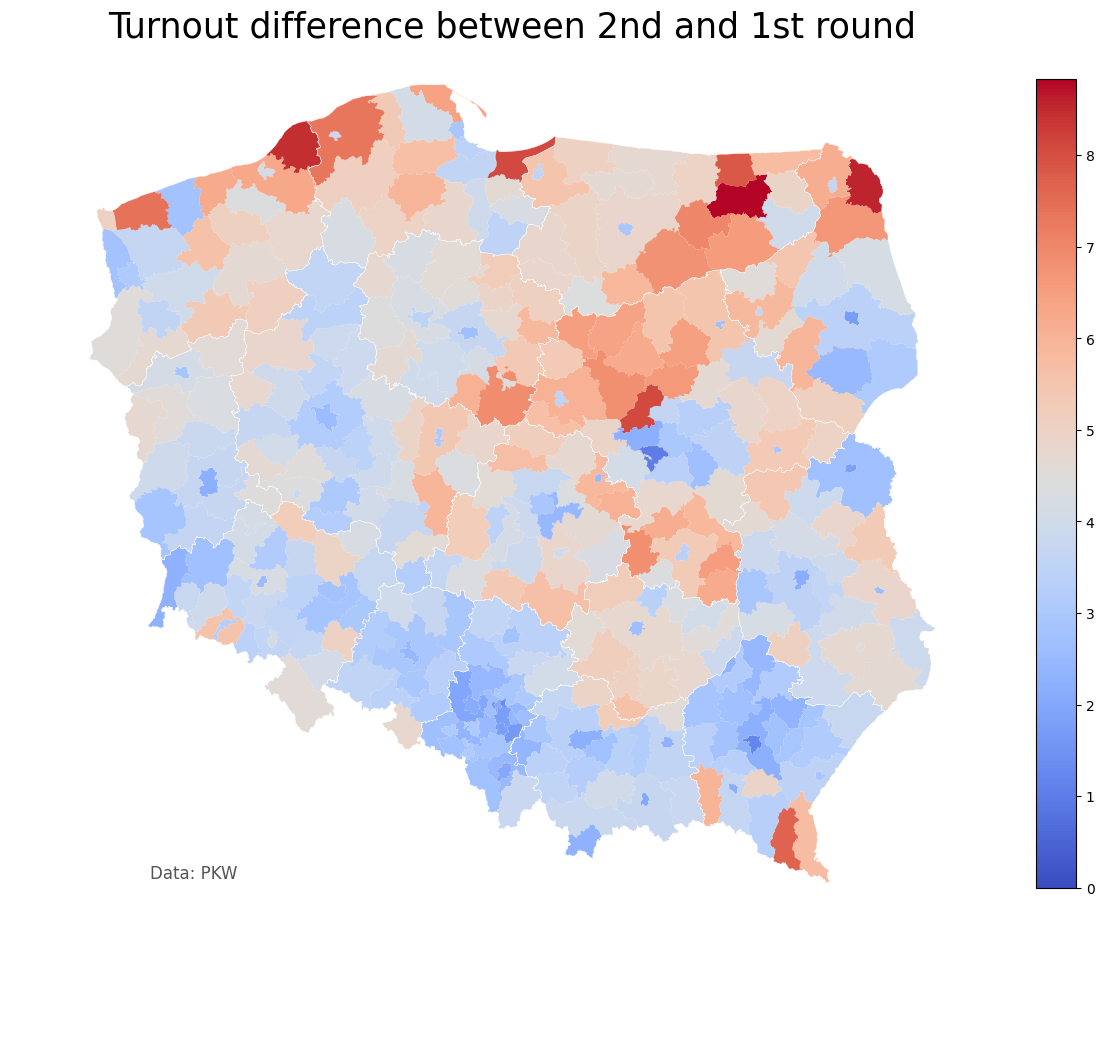

In [13]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Turnout difference between 2nd and 1st round", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=vmax))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Fr2-Fr1", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=vmax);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Turnout difference", dpi=200, bbox_inches='tight')

It appears that central and northern parts of the country observed the most significant increase in turnout, while the turnout in major cities and the south was particularly stagnant between the two rounds.